### read matches, clusters, gold labels

In [395]:
from utils.db_utils import gold_fragments_df_for_signer, fragment_tokenizer, get_labels_for_signer, nodes_with_types
from utils.ZR_utils import get_clusters_list, get_nodes_df, get_matches_df, get_matches_all
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd

signer_id = ['Signer04']
exp_name = 'zrroot0_corAE_op100_s4s5_64_iter0_self_tanh_Signer0450_10_4_02_7_05_06_7_06_032/exp/corAE_op100_s4s5_64_iter0_self_tanh_Signer0450_10_4_02_7_05_06_7_06_032'
df = get_labels_for_signer(signer_id)
group = 3

In [114]:
df

,index,phase,signer,folder,frame,label,label_name
0,0,train,Signer04,01April_2010_Thursday_heute_default-0,fn000000-0.png,2385,__ON__0
1,1,train,Signer04,01April_2010_Thursday_heute_default-0,fn000001-0.png,2385,__ON__0
2,2,train,Signer04,01April_2010_Thursday_heute_default-0,fn000002-0.png,2386,__ON__1
3,3,train,Signer04,01April_2010_Thursday_heute_default-0,fn000003-0.png,2386,__ON__1
4,4,train,Signer04,01April_2010_Thursday_heute_default-0,fn000004-0.png,2387,__ON__2
5,5,train,Signer04,01April_2010_Thursday_heute_default-0,fn000005-0.png,2387,__ON__2
6,6,train,Signer04,01April_2010_Thursday_heute_default-0,fn000006-0.png,1560,LIEB0
7,7,train,Signer04,01April_2010_Thursday_heute_default-0,fn000007-0.png,1560,LIEB0
8,8,train,Signer04,01April_2010_Thursday_heute_default-0,fn000008-0.png,1560,LIEB0
9,9,train,Signer04,01April_2010_Thursday_heute_default-0,fn000009-0.png,1560,LIEB0


In [9]:
excluded_labels = [3693, 2370, 2371, 2372, 2385, 2386, 2387]

#### gold labels

In [115]:
gold_fragments = gold_fragments_df_for_signer(signer_id, group=group)
print(len(gold_fragments))
gold_fragments.head(9)

7840


,Unnamed: 0,signer_id,filename,start,end,label,labelname
0,0,Signer04,02December_2011_Friday_tagesschau_default-12,86,88,1,AACHEN
1,1,Signer04,20November_2011_Sunday_tagesschau_default-4,0,9,2,AB
2,2,Signer04,05February_2011_Saturday_tagesschau_default-12,66,74,2,AB
3,3,Signer04,20February_2010_Saturday_tagesschau_default-3,2,9,2,AB
4,4,Signer04,06February_2010_Saturday_tagesschau_default-3,2,9,2,AB
5,5,Signer04,05September_2010_Sunday_tagesschau_default-3,3,10,2,AB
6,6,Signer04,04July_2010_Sunday_tagesschau_default-3,5,11,2,AB
7,7,Signer04,18July_2009_Saturday_tagesschau_default-4,2,7,2,AB
8,8,Signer04,23April_2010_Friday_tagesschau_default-10,91,96,2,AB


In [116]:
gold_fragments.label.unique()

array([   1,    2,    3,    4,    7,   13,   14,   16,   17,   18,   20,
         26,   27,   28,   35,   39,   41,   44,   49,   52,   55,   57,
         61,   64,   66,   68,   74,   76,   78,   80,   86,   87,   91,
         92,   94,  102,  103,  110,  111,  114,  116,  122,  124,  125,
        127,  129,  134,  136,  137,  140,  141,  143,  144,  148,  151,
        155,  156,  158,  161,  163,  164,  169,  171,  172,  173,  174,
        176,  177,  178,  179,  183,  184,  185,  186,  187,  188,  189,
        190,  191,  192,  193,  196,  198,  199,  202,  203,  204,  207,
        208,  210,  211,  217,  218,  220,  224,  225,  228,  229,  231,
        233,  236,  239,  242,  244,  246,  250,  251,  264,  271,  273,
        280,  286,  288,  289,  290,  292,  293,  294,  298,  299,  301,
        304,  305,  307,  308,  309,  313,  314,  316,  318,  322,  323,
        324,  326,  327,  332,  333,  337,  340,  343,  344,  349,  352,
        353,  358,  360,  361,  363,  366,  367,  3

#### matches

In [360]:
matches_df = get_matches_all(exp_name)
matches_df.head(3)

Read 3939 matches
Read 6983 matches
Read 8531 matches
Read 6381 matches
Read 8021 matches
Read 7028 matches
Read 7608 matches
Read 7108 matches
Read 6236 matches
Read 8510 matches
Read 6450 matches
Read 6901 matches
Read 7401 matches
Read 8118 matches
Read 5463 matches
Read 8459 matches


,f1,f2,f1_start,f1_end,f2_start,f2_end,score,rho
0,01October_2010_Friday_tagesschau_default-5,04December_2011_Sunday_tagesschau_default-4,53,68,32,54,0.844969,1.795240
1,01October_2010_Friday_tagesschau_default-5,28December_2011_Wednesday_tagesschau_default-4,8,30,87,109,0.869455,2.593125
2,01October_2010_Friday_tagesschau_default-5,05September_2009_Saturday_tagesschau_default-2,0,13,49,65,0.897921,6.020024


#### nodes 

In [361]:
nodes_df = get_nodes_df(exp_name)
#nodes_df = nodes_with_types(nodes_df, gold_fragments, thr=0.5)
print(len(nodes_df))
nodes_df.sort_values(by=['filename','start']).head(4)

Read 92066 nodes/tokens
92066


,filename,start,end,score,unknown,file_id
82209,01April_2010_Thursday_heute_default-0,7,26,0.890786,1.828280,1
69310,01April_2010_Thursday_heute_default-0,122,139,0.896828,18.135401,1
78848,01April_2010_Thursday_heute_default-0,122,146,0.905008,26.061190,1
82201,01April_2010_Thursday_heute_default-0,122,142,0.905335,23.636572,1


#### clusters

In [408]:
clusters_list

[[7, 8],
 [21, 22],
 [23, 24],
 [27, 28],
 [41, 42, 52],
 [49, 50],
 [53, 54],
 [55, 56],
 [59, 60],
 [67, 68],
 [69, 70],
 [71, 72],
 [105, 106, 180],
 [121, 122],
 [133, 134],
 [169, 170],
 [219, 220],
 [279, 280],
 [381, 382],
 [383, 384],
 [403, 404],
 [415, 416],
 [433, 434, 466],
 [435, 436],
 [439, 440, 444, 72360],
 [441, 442],
 [445, 446],
 [449, 450],
 [453, 454],
 [473, 474],
 [491, 492, 58257, 82525],
 [497, 498],
 [507, 508],
 [509, 510],
 [515, 516],
 [517, 518],
 [519, 520],
 [537, 538],
 [573, 574],
 [585, 586],
 [609, 610],
 [761, 762],
 [825, 826],
 [829, 830],
 [833, 834],
 [837, 838],
 [841, 842],
 [857, 858],
 [863, 864, 9319],
 [869, 870],
 [875, 876],
 [915, 916],
 [921, 922],
 [927, 928],
 [969, 970],
 [1015, 1016],
 [1019, 1020],
 [1057, 1058],
 [1065, 1066],
 [1089, 1090],
 [1093, 1094, 67242],
 [1097, 1098],
 [1101, 1102, 61851, 61852],
 [1107, 1108],
 [1113, 1114],
 [1115, 1116],
 [1121, 1122],
 [1125, 1126],
 [1135, 1136],
 [1145, 1146],
 [1147, 1148],
 [11

In [362]:
clusters_list = get_clusters_list(exp_name)

Read 2097 clusters


In [402]:
from utils.eval import evaluate
scores = evaluate(None, signer_id, matches_df, nodes_df, clusters_list,
                          group=3, interp=False, boundary_th=0.5, fast_compute=True)
scores

48.998391577716035% OVERLAP


OrderedDict([('n_match', 113137),
             ('n_node', 4524),
             ('n_clus', 2097),
             ('mean_len', 22.675729442970823),
             ('mean_n_type', 1.3667108753315649),
             ('ned', 0.8341272580830746),
             ('coverage', 0.5944036082298543),
             ('matching_P', 0),
             ('matching_R', 0),
             ('matching_F', 0),
             ('purity', 0.44665055424684635),
             ('inv_purity', 0.07756396528691324),
             ('garbage_ratio', 0.16719184997093645),
             ('avg_purity', 0.5722811671087533),
             ('clus_purity', 0.5181255526083113),
             ('clus_purity_inv', 0.29929266136162685),
             ('grouping_P', 0.09084880636604775),
             ('grouping_R', 0.13279483037156706),
             ('grouping_F', 0.10788817430108939),
             ('type_P', 0.6),
             ('type_R', 0.1565217391304348),
             ('type_F', 0.2482758620689655)])

overlap eden segmentlerden en uzunu kalacak sekilde koru

In [335]:
def unite_clusters(clusters_list):
    clusters_set = set()
    for row in clusters_list: clusters_set |= set(row)
        
    return list(clusters_set)
    

def overlap_pairwise_compare(tmp):
    fnames = sorted(tmp.filename.unique())
    to_remove_idx = []
    clus2merge = []

    for i,name in enumerate(fnames):
        filedf = tmp.loc[tmp.filename == name]

        infile2remove = []
        for (p1,p2) in itertools.combinations(filedf.index,2):

            s1,e1 = filedf.loc[p1][['start','end']]
            s2,e2 = filedf.loc[p2][['start','end']]

            nolap = len(set(np.arange(s1,e1)) & set(np.arange(s2,e2)))
            if nolap == 0: continue
            ntotal = (max(e1,e2) - min(s1,s2))
            if nolap >= 0.5*ntotal:
                rmv_id = np.argmin([e1-s1,e2-s2])
                infile2remove.append([p1,p2][rmv_id])
                clus2merge.append((p1,p2))

        infile2remove = list(np.unique(infile2remove))
        to_remove_idx.extend(infile2remove)

    return to_remove_idx, clus2merge



In [336]:
def unite_conn_pairs_of_clusters(clus2merge):
    new_clusterings = [] # list of sets
    for p1,p2 in clus2merge:
        query_set = set([p1,p2])
        new_set = True
        for c,cls in enumerate(new_clusterings):
            if len(cls & query_set)>0:
                new_clusterings[c] |= query_set
                new_set = False
                break
        if new_set: new_clusterings.append(query_set)
    return new_clusterings

In [337]:
def purify_clusters(clusters_list, nodes_df):

    all_centroids = unite_clusters(clusters_list)
    tmp = nodes_df.loc[all_centroids]

    to_remove_idx, _ = overlap_pairwise_compare(tmp)

    new_clusters = []
    for clus in clusters_list:
        tmp_clus = []
        for c in clus:
            if c not in to_remove_idx:
                tmp_clus.append(c)
        if len(tmp_clus) > 1: new_clusters.append(tmp_clus)

    all_centroids = unite_clusters(new_clusters)
    nodes_df = nodes_df.loc[all_centroids]

    return new_clusters, nodes_df


In [279]:
new_clustes , ndos = purify_clusters(clusters_list, nodes_df)

KeyboardInterrupt: 

In [208]:
new_clusters

,filename,start,end,score,unknown,file_id
23,01October_2010_Friday_tagesschau_default-5,65,89,0.891345,4.290166,26
24,04July_2010_Sunday_tagesschau_default-12,49,68,0.891345,4.290166,164
22,12December_2009_Saturday_tagesschau_default-10,10,32,0.897491,1.916226,394


In [363]:
all_centroids = unite_clusters(clusters_list)
tmp = nodes_df.loc[all_centroids]

len(clusters_list),len(all_centroids)

(2097, 4524)

In [366]:
s = 0
for c in clusters_list: s+= len(c)
s

4524

In [364]:
tmp = nodes_with_types(gold_fragments=gold_fragments, nodes_df=tmp)
tmp.head()

,filename,start,end,score,unknown,file_id,types
81920,24July_2010_Saturday_tagesschau_default-7,26,41,0.899216,13.853475,711,"(910,)"
65538,24January_2010_Sunday_tagesschau_default-3,112,127,0.902323,5.503402,701,"(3,)"
7,01October_2010_Friday_tagesschau_default-5,70,92,0.904988,25.283558,26,"(954,)"
8,18October_2010_Monday_heute_default-1,101,121,0.904988,25.283558,494,"(1058,)"
49161,03October_2010_Sunday_tagesschau_default-10,21,61,0.896120,14.268189,126,"(676, 956)"


In [365]:
to_remove_idx, clus2merge = overlap_pairwise_compare(tmp)

In [404]:
clus2merge

[(82197, 82199),
 (82197, 58388),
 (82199, 58388),
 (875, 927),
 (82426, 55054),
 (82426, 79744),
 (82426, 6114),
 (50382, 86822),
 (13869, 55054),
 (13869, 6114),
 (55054, 6114),
 (79744, 6114),
 (72549, 72551),
 (72559, 72567),
 (28, 74738),
 (28, 35974),
 (28, 39259),
 (28, 39269),
 (74738, 35974),
 (74738, 39269),
 (84060, 39297),
 (35974, 39269),
 (54666, 39257),
 (3198, 73366),
 (21922, 73366),
 (9311, 70960),
 (9311, 81262),
 (70960, 81262),
 (10018, 34610),
 (38074, 38921),
 (38074, 81116),
 (38921, 81116),
 (90256, 90258),
 (90256, 14628),
 (90258, 14628),
 (41892, 13160),
 (41892, 46562),
 (13160, 46562),
 (68192, 24299),
 (49462, 78287),
 (78305, 78307),
 (78305, 78281),
 (78305, 78299),
 (78307, 78281),
 (78307, 78299),
 (78281, 78299),
 (78287, 78303),
 (67898, 70232),
 (82582, 1020),
 (1020, 27559),
 (36390, 14756),
 (37895, 81308),
 (67595, 67611),
 (970, 91612),
 (970, 91610),
 (970, 36549),
 (970, 32756),
 (91612, 91610),
 (91612, 79592),
 (91612, 32756),
 (91610, 3275

In [405]:
new_clusterings = unite_conn_pairs_of_clusters(clus2merge)
new_clusterings

[{58388, 82197, 82199},
 {875, 927},
 {6114, 13869, 55054, 79744, 82426},
 {50382, 86822},
 {72549, 72551},
 {72559, 72567},
 {28, 35974, 39259, 39269, 74738},
 {39297, 84060},
 {39257, 54666},
 {3198, 21922, 73366},
 {9311, 70960, 81262},
 {10018, 34610},
 {38074, 38921, 81116},
 {14628, 90256, 90258},
 {13160, 41892, 46562},
 {24299, 68192},
 {49462, 78287, 78303},
 {78281, 78299, 78305, 78307},
 {67898, 70232},
 {1020, 27559, 82582},
 {14756, 36390},
 {37895, 81308},
 {67595, 67611},
 {970, 32756, 36549, 79592, 91610, 91612},
 {73757, 74197},
 {73713, 74077, 74171, 74209},
 {8432, 8882},
 {33802, 37109},
 {37127, 37137},
 {6040, 37147, 37153},
 {28198, 29144, 32422, 33579},
 {25978, 33591, 33683},
 {30194, 31430, 33595, 59024},
 {19694, 19696},
 {7, 23},
 {58664, 75850, 75852},
 {15237, 15365, 57566, 64804},
 {15231, 15243, 15263, 15329, 15353},
 {15249, 15261, 15269},
 {9858, 11278, 26708},
 {29591, 29609},
 {13542, 29599},
 {50046, 57767, 57825},
 {57775, 57833},
 {24880, 29495, 8

In [407]:
new_clusterings2 = clus2merge(new_clusterings)

TypeError: 'list' object is not callable

In [406]:
tmp_all = set()
ntot = 0
for clus in new_clusterings:
    ntot += len(clus)
    tmp_all |= set(clus)
print(ntot,len(tmp_all))

3043 2994


In [369]:
clusindex = np.zeros((len(all_centroids),2), dtype=np.uint64)
lst = 0
for i,clus in enumerate(clusters_list):
    clusindex[lst:lst+len(clus),0] = clus
    clusindex[lst:lst+len(clus),1] = i
    lst += len(clus)
clusindex

array([[    7,     0],
       [    8,     0],
       [   21,     1],
       ...,
       [92024,  2095],
       [92035,  2096],
       [92036,  2096]], dtype=uint64)

In [370]:
new_clusters = []

In [371]:
for i,newclus in enumerate(new_clusterings):
    cand_clus = sum([clusters_list[clusindex[clusindex[:,0]==p1,1][0]] for p1 in list(newclus)],[])
    #new_clusters.append(list(set(cand_clus) - set(to_remove_idx)))
    new_clusters.append(cand_clus)

In [332]:
[clusters_list[clusindex[clusindex[:,0]==p1,1][0]] for p1 in list(new_clusterings[0])]

[[58387, 58388], [82197, 82198], [3977, 3978, 27233, 27234, 82199]]

In [372]:
cand_clus

[63145, 63146, 63301, 63302]

In [375]:
new_allclus= unite_clusters(new_clusters)
len(new_clusters),len(new_allclus)

(1035, 4003)

In [380]:
s = np.zeros((50))
for c in new_clusters: s[len(c)] += 1
s.sum()

1035.0

<StemContainer object of 3 artists>

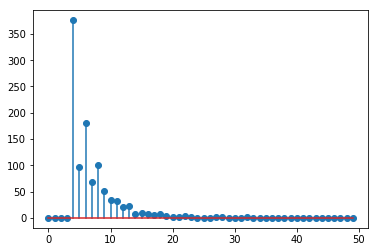

In [381]:
plt.stem(s)

In [382]:
new_noolap_clus = []
for clus in new_clusters:
    to_remove_idx, _ = overlap_pairwise_compare(nodes_df.loc[clus])
    new_noolap_clus.append(list(set(clus) - set(to_remove_idx)))

In [383]:
new_allclus= unite_clusters(new_noolap_clus)
len(new_noolap_clus),len(new_allclus)

(1035, 3370)

In [400]:
s = np.zeros((50))
for c in new_noolap_clus: s[len(c)] += len(c)
s.sum()

4917.0

In [399]:
sum(pd.Series(np.concatenate(new_noolap_clus)).value_counts()>1)

1170

In [373]:
tmp.loc[cand_clus]

,filename,start,end,score,unknown,file_id,types
63145,31July_2010_Saturday_tagesschau_default-9,74,93,0.903842,14.858539,836,"(649,)"
63146,05February_2011_Saturday_tagesschau_default-9,74,89,0.903842,14.858539,212,"(1225, 202)"
63301,31July_2010_Saturday_tagesschau_default-9,70,95,0.894289,20.959789,836,"(649,)"
63302,02July_2009_Thursday_tagesschau_default-6,39,60,0.894289,20.959789,61,"(1122,)"


In [388]:
to_remove_idx, c2m = overlap_pairwise_compare(nodes_df.loc[new_allclus])

In [390]:
len(to_remove_idx)

1257

In [403]:
scores = evaluate(None, signer_id, matches_df, nodes_df, new_noolap_clus,
                          group=3, interp=False, boundary_th=0.5, fast_compute=True)
scores

62.51977864659639% OVERLAP


OrderedDict([('n_match', 113137),
             ('n_node', 3370),
             ('n_clus', 1035),
             ('mean_len', 23.45252225519288),
             ('mean_n_type', 1.4065281899109792),
             ('ned', 0.8779130651595732),
             ('coverage', 0.5086172617898002),
             ('matching_P', 0),
             ('matching_R', 0),
             ('matching_F', 0),
             ('purity', 0.3235833406094473),
             ('inv_purity', 0.07855583689862917),
             ('garbage_ratio', 0.1594080153671527),
             ('avg_purity', 0.5919881305637982),
             ('clus_purity', 0.3105552165954851),
             ('clus_purity_inv', 0.25137278828553994),
             ('grouping_P', 0.13382789317507418),
             ('grouping_R', 0.2032447048219919),
             ('grouping_F', 0.16138844158167828),
             ('type_P', 0.7090909090909091),
             ('type_R', 0.11304347826086956),
             ('type_F', 0.19499999999999998)])

In [305]:
nodes_df.loc[63301]

filename    31July_2010_Saturday_tagesschau_default-9
start                                              70
end                                                95
score                                        0.894289
unknown                                       20.9598
file_id                                           836
Name: 63301, dtype: object

In [294]:
for p1,p2 in clus2merge:
    p1

In [284]:

clusindex[:20]

array([[ 7,  0],
       [ 8,  0],
       [21,  1],
       [22,  1],
       [23,  2],
       [24,  2],
       [27,  3],
       [28,  3],
       [41,  4],
       [42,  4],
       [52,  4],
       [49,  5],
       [50,  5],
       [53,  6],
       [54,  6],
       [55,  7],
       [56,  7],
       [59,  8],
       [60,  8],
       [67,  9]], dtype=uint64)

In [251]:
infile2remove

[58388, 82197]

In [264]:


# find overlaps
to_remove_dict = dict()
for i, row in tmp.iterrows():
    f,s,e = row[['filename','start','end']]
    prev_vals, cnts = np.unique(discovered_counts[f][s:e], return_counts=True)
#    if len(prev_vals) > 2: break
    zero_idx = np.where(prev_vals==0)[0]
    prev_vals, cnts = np.delete(prev_vals,zero_idx), np.delete(cnts,zero_idx)
    
    if len(prev_vals)==0: cnts_mx = 0
    else: cnts_mx = cnts.max()
        
    if  cnts_mx > 0.5*(e-s): # rm index
        i_first = int(prev_vals[cnts.argmax()])
        to_remove_dict[str(i_first)].append((i,f,s,e))
    else:
        discovered_counts[f][s:e] = i
        to_remove_dict[str(i)] = [(i,f,s,e)]

In [265]:
to_remove_dict

{'45056': [(45056, '22July_2009_Wednesday_tagesschau_default-6', 167, 186),
  (28458, '22July_2009_Wednesday_tagesschau_default-6', 174, 197)],
 '24591': [(24591, '26September_2010_Sunday_tagesschau_default-8', 98, 115)],
 '24592': [(24592, '17October_2009_Saturday_tagesschau_default-5', 77, 98)],
 '21': [(21, '01October_2010_Friday_tagesschau_default-5', 5, 19)],
 '22': [(22, '12December_2009_Saturday_tagesschau_default-10', 10, 32)],
 '23': [(23, '01October_2010_Friday_tagesschau_default-5', 65, 89)],
 '24': [(24, '04July_2010_Sunday_tagesschau_default-12', 49, 68)],
 '61461': [(61461, '18October_2010_Monday_heute_default-1', 51, 83)],
 '61462': [(61462, '03October_2010_Sunday_tagesschau_default-3', 124, 166),
  (40511, '03October_2010_Sunday_tagesschau_default-3', 135, 153)],
 '28703': [(28703, '18October_2010_Monday_tagesschau_default-3', 44, 77)],
 '28704': [(28704, '18June_2010_Friday_tagesschau_default-6', 1, 21)],
 '36899': [(36899, '08February_2010_Monday_heute_default-7', 13,

In [266]:
to_rmv_list = []
for k,tuples in to_remove_dict.items():
    if len(tuples) > 1: 
        to_rmv_list.append(tuples)
        
to_rmv_list

[[(45056, '22July_2009_Wednesday_tagesschau_default-6', 167, 186),
  (28458, '22July_2009_Wednesday_tagesschau_default-6', 174, 197)],
 [(61462, '03October_2010_Sunday_tagesschau_default-3', 124, 166),
  (40511, '03October_2010_Sunday_tagesschau_default-3', 135, 153)],
 [(12364, '29September_2009_Tuesday_tagesschau_default-1', 77, 104),
  (80584, '29September_2009_Tuesday_tagesschau_default-1', 94, 113)],
 [(8271, '03October_2010_Sunday_tagesschau_default-6', 10, 44),
  (610, '03October_2010_Sunday_tagesschau_default-6', 23, 35)],
 [(77964, '26September_2010_Sunday_tagesschau_default-8', 191, 207),
  (9958, '26September_2010_Sunday_tagesschau_default-8', 183, 200)],
 [(86223, '21October_2009_Wednesday_tagesschau_default-5', 106, 129),
  (86281, '21October_2009_Wednesday_tagesschau_default-5', 122, 130)],
 [(86224, '22October_2009_Thursday_tagesschau_default-12', 9, 42),
  (31693, '22October_2009_Thursday_tagesschau_default-12', 3, 16)],
 [(61695, '05September_2010_Sunday_tagesschau_def

In [267]:
len(to_rmv_list)

124

In [268]:
# discard all except longest
for idx,tpls in enumerate(to_rmv_list):
    tmp = []
    for (i,f,s,e) in tpls:
        tmp.append(e-s)

    to_keep = np.array(tmp).argmax()
    del tpls[to_keep]
    
to_rmv_list

[[(45056, '22July_2009_Wednesday_tagesschau_default-6', 167, 186)],
 [(40511, '03October_2010_Sunday_tagesschau_default-3', 135, 153)],
 [(80584, '29September_2009_Tuesday_tagesschau_default-1', 94, 113)],
 [(610, '03October_2010_Sunday_tagesschau_default-6', 23, 35)],
 [(77964, '26September_2010_Sunday_tagesschau_default-8', 191, 207)],
 [(86281, '21October_2009_Wednesday_tagesschau_default-5', 122, 130)],
 [(31693, '22October_2009_Thursday_tagesschau_default-12', 3, 16)],
 [(50200, '05September_2010_Sunday_tagesschau_default-0', 97, 115)],
 [(8882, '01October_2010_Friday_tagesschau_default-2', 14, 24)],
 [(31497, '06September_2010_Monday_tagesschau_default-7', 75, 91)],
 [(48984, '06May_2010_Thursday_heute_default-0', 134, 154)],
 [(10942, '06November_2010_Saturday_tagesschau_default-6', 125, 134)],
 [(39512, '22January_2011_Saturday_tagesschau_default-12', 72, 93)],
 [(510, '07November_2010_Sunday_tagesschau_default-2', 85, 109)],
 [(42159, '09July_2010_Friday_tagesschau_default-7',

In [205]:
# save the indices only
to_remove_idx = []
for idx,tpls in enumerate(to_rmv_list):
    tmp = []
    for (i,f,s,e) in tpls: to_remove_idx.append(i)

to_remove_idx

[49161,
 11398,
 45296,
 6040,
 10942,
 61818,
 70020,
 82353,
 60770,
 86514,
 1263,
 37387,
 37394,
 63376,
 50073,
 91128,
 50124,
 91161,
 1121,
 1101,
 1102,
 81360,
 78955,
 66696,
 77651,
 77748,
 38074,
 25816,
 25884,
 43186,
 79761,
 75269,
 18770,
 17987,
 85139,
 79676,
 69554,
 27226,
 64154,
 20188,
 43850,
 20356,
 81386,
 19243,
 19776,
 56579,
 11481,
 73335,
 77443,
 36549,
 24568,
 32538]

In [206]:
len(to_remove_idx)

52

In [166]:
f,s,e = row[['filename','start','end']]
prev_vals, cnts = np.unique(discovered_counts[f][s:e], return_counts=True)
prev_vals, cnts

(array([279., 383., 403.]), array([19, 14,  6]))

In [167]:
zero_idx = np.where(prev_vals==0)[0]
prev_vals, cnts = np.delete(prev_vals,zero_idx), np.delete(cnts,zero_idx)
prev_vals,cnts

(array([279., 383., 403.]), array([19, 14,  6]))

In [168]:
if len(prev_vals)==0: cnts_mx = 0
else: cnts_mx = cnts.max()

cnts_mx

19

In [169]:
if  cnts_mx > 0.5*(e-s): # rm index
    i_first = int(prev_vals[cnts.argmax()])
    to_remove_dict[str(i_first)].append((i,f,s,e))
else:
    discovered_counts[f][s:e] = i
    to_remove_dict[str(i)] = [(i,f,s,e)]


In [170]:
discovered_counts[f][s:e] 

array([49536., 49536., 49536., 49536., 49536., 49536., 49536., 49536.,
       49536., 49536., 49536., 49536., 49536., 49536., 49536., 49536.,
       49536., 49536., 49536., 49536., 49536., 49536., 49536., 49536.,
       49536., 49536., 49536., 49536., 49536., 49536., 49536., 49536.,
       49536., 49536., 49536., 49536., 49536., 49536., 49536.])

## matching 

###  NED
computed over discovered pairs `matches_df`  
**note:** NED should be computed over disc clusters  
labellar 'gold fragments'ten geldigi icin, garbage labellar dikkate alinmiyor
eger framelerden birinde hiç label bulunmadıysa NED = 1 oluyor

In [ ]:
# NED should be computed over pairs of discovered clusters

import stringdist

#if len(matches_df) == 0: return 1.0

P_clus = []
for clus in clusters_list:
    for pair in itertools.combinations(clus,2):
        P_clus.append(list(pair))

neds = np.zeros(len(P_clus))

for i,pair in enumerate( P_clus ):

    labels = []
    
    for p in pair:
    
#        filename, start, end = (nodes_df['filename'][p], nodes_df['start'][p], nodes_df['end'][p])
#        labels.append( fragment_tokenizer(gold_fragments, filename, start, end) )
        labels.append(nodes_df.types[p])
    # in order not to count garbage classes from different sequences as the same label
#    labels[0][ labels[0] == -1] -= 1
    
    print(labels)
    if (len(labels[0]) == 0) | (len(labels[1]) == 0): 
        neds[i] = 1.       
    else:
        neds[i] = stringdist.levenshtein_norm(labels[0], labels[1])

print(neds)
print(sum(neds) / len(neds))

### coverage
percantage of discovered tokens to all tokens  (frames to frames ?)  
**FIXED: ensure non-overlapping fragments**

In [ ]:
gold_fragments.head()

In [ ]:
gold_fragments.labelname.value_counts()[gold_fragments.labelname.value_counts() > 1].values.sum()

In [ ]:
'AUSSEHEN' in non_single_set

In [ ]:
def number_of_discovered_frames(nodes_df):
    total_frames = 0
    n_found_frames = 0
    for filename in nodes_df.filename.unique():
        tmp = nodes_df.loc[nodes_df.filename == filename]
        total_frames += (tmp.end - tmp.start + 1).values[0]
        frames_found = np.zeros(tmp.end.max() + 1)
        for i, row in tmp.iterrows():
            frames_found[row['start']:row['end'] + 1] = 1
        n_found_frames += sum(frames_found)

    if(1 - n_found_frames / total_frames > .1): print('MORE THAN 10% OVERLAP')
    
    return n_found_frames
    

In [ ]:
# coverage i singletonlari cikarip hesapla

non_single_set = gold_fragments.labelname.value_counts()[gold_fragments.labelname.value_counts() > 1].keys()
non_single_gold_df = gold_fragments.loc[gold_fragments.labelname.apply(lambda x: x in non_single_set)]
n_discoverable_frames = sum(non_single_gold_df.end - non_single_gold_df.start )

#if len(nodes_df) == 0: return 0.0

n_found_frames = number_of_discovered_frames(nodes_df)
coverage = n_found_frames / n_discoverable_frames
coverage


In [ ]:
# frame uzerinden singleton lar dahil
total_frames = 0
n_found_frames = 0
for filename in nodes_df.filename.unique(): 
    tmp = nodes_df.loc[nodes_df.filename == filename]
    total_frames += (tmp.end - tmp.start).values[0]
    frames_found = np.zeros(tmp.end.max()+1)
    for i, row in tmp.iterrows():
        frames_found[row['start'] : row['end'] + 1] = 1
#        print(row['start'],row['end'] + 1)
#        print(sum(frames_found))
    n_found_frames += sum(frames_found)
print('number of non-overlapping discovered frames: {}'.format(n_found_frames))
if (1 - n_found_frames / total_frames > .2): print('MORE THAN 20% OVERLAP')

In [ ]:
coverage = n_found_frames / len(df)
print('coverage (frames) : {:.3f}'.format(coverage))

In [ ]:
n_discoverable_frames, len(df)

In [ ]:
# term uzerinden singleton haric
n_discovered_words = sum(nodes_df.types.apply(lambda x: len(x)))
n_discovered_words / len(non_single_gold_df)


In [ ]:
from utils.db_utils import fragment_tokenizer

candidate_fragments.end - candidate_fragments.start

In [ ]:
candidate_fragments = non_single_gold_df.loc[non_single_gold_df.filename == row.filename].sort_values(by='start')
candidate_fragments.loc[((candidate_fragments.start < )&()) | 
                        (()&()) |
                        (()&())]

In [ ]:
row

In [ ]:
for idx,row in nodes_df.iterrows():
    print(row.filename)

### precision & recall
`nodes_df` -> $F_{disc}$

#### nodes with types

In [ ]:
# find included types
nodes_df = nodes_df.loc[all_centroids]
types_list = []
for i, row in nodes_df.iterrows():
    types_list.append( tuple(fragment_tokenizer(gold_fragments, row.filename, row.start, row.end) ))
nodes_df['types'] = types_list
nodes_df

In [ ]:
types = nodes_df.types.unique()
types

In [ ]:
row = nodes_df.loc[2]
(row.filename, row.types)

In [ ]:
(nodes_df.end - nodes_df.start).hist(bins=range(50))

In [ ]:
print('average fragment length')
(nodes_df.end - nodes_df.start + 1).mean()

In [ ]:
print('average number of types in a fragment')
sum([len(nodes_df.types.values[i]) for i in range(len(nodes_df)) ]) / float(len(nodes_df))

## clustering

find $P_{clus}$ = frame indice pairs for segments that belong to the same cluster  
and $P_{goldclus}$ = frame indice pairs that are in $C_{disc}$ and have the same labels  
intersection will be shared frames  
$types(flat(P))$ = set of unique types in $P$  
$freq(t,P)$ = how many segments in $P$ contain $t$


### saving frames

In [ ]:
from shutil import rmtree, copyfile
from os.path import join
from os import makedirs
from utils.db_utils import img_paths_for_folder


img_root = '/home/korhan/Desktop/tez/dataset/features/fullFrame-210x260px/train'
dest_root = '/home/korhan/Dropbox/tez/match_node_imgs'

rmtree(join(dest_root), ignore_errors=True)

for c, clus in enumerate(clusters_list):
    
    clus_name = 'clus_' + str(c).zfill(2)

    for node_idx in clus:
    
        row = nodes_df.loc[node_idx]
        
        foldername = row['filename']
        start = row['start']
        end = row['end']
        node_name = 'node_' + str(node_idx).zfill(3)

        makedirs(join(dest_root, clus_name, node_name))

        label_names = list(df.label_name[df.folder == foldername][start: end + 1])  # assume frames start from 0
        img_paths = img_paths_for_folder(img_root, foldername, start, end + 1)

        for j, img_path in enumerate(img_paths):
            copyfile(img_path,
                     join(dest_root, clus_name, node_name, img_path.split('/')[-1][:-4] + '_' + label_names[j] + '.png'))



### cluster purity 

In [ ]:
import matplotlib.pyplot as plt
plot_th = .1
G = np.zeros((3694//group+1, len(clusters_list)))

for c, cluster in enumerate(clusters_list):
#        print(cluster)
    for i in range(len(cluster)):
        token_id = cluster[i]
        token = nodes_df.loc[token_id]
        label_counts = df.label[ df.folder == token.filename ][token.start:token.end].value_counts()
        for count in label_counts.iteritems():
            G[count[0]//group,c] += count[1]

G_nongarbage = G[:-1] # exclude garbage labels
purity = sum(G_nongarbage.max(axis=0)) / G.sum()
inv_purity = sum(G_nongarbage.max(axis=1)) / G.sum()
garbage_ratio = sum(G[-1]) / G.sum()

#print('cluster purity: {:.3}, \t inverse purity: {:.3}'.format(purity, inv_purity))
#print('Garbage frame ratio: {:.3}'.format(sum(G[-1]) / G.sum()))

if plot_th > 0:
    nonzero_labels = np.array(np.where(~np.all(G < plot_th, axis=1))).squeeze().tolist()
    nonzero_labels = [df.label_name[df.label == label * group][0:1].item()[:-1] for label in nonzero_labels]

    G = G[~np.all(G < plot_th, axis=1)]  # delete zero rows
    G_norm = G / G.sum(axis=0)  # normalize clusters

    fig, ax = plt.subplots(1, 1, figsize=(int(G.shape[1]/3) ,int(len(nonzero_labels) / 3) ) )
    im = ax.imshow(G_norm, cmap='Blues', vmin=0, vmax=1)
    ax.set_yticks(np.arange(len(nonzero_labels)))
    ax.set_yticklabels(nonzero_labels, fontsize=8, rotation=2)
    ax.set_xticks(np.arange( G.shape[1] ))
    ax.set_xlabel('cluster IDs')
    ax.set_ylabel('word types')
    cbar = fig.colorbar(im, ax=ax, fraction=0.086, pad=0.04)
    
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if G[i, j] > 0:
                text = ax.text(j, i, int(G[i, j]),ha="center", va="center", color="r")

In [ ]:
purity, inv_purity

In [ ]:
for c, cluster in enumerate(clusters_list):
    within_cluster_labels = np.zeros(len(cluster))
    for i in range(len(cluster)):
        token_id = cluster[i]
        token = nodes_df.loc[token_id]
        label_counts = df.label[ df.folder == token.filename ][token.start:token.end].value_counts()
#        print(label_counts)
#        for count in label_counts.iteritems():
#            G[count[0]//group,c] += count[1]


In [ ]:
label_counts = (df.label[ df.folder == token.filename ][token.start:token.end] // group).value_counts()
#if top2labels[0] != 3693 // group: within_cluster_labels[i] = top2labels
label_counts.keys()[0]

In [ ]:


3693 // group

In [ ]:
F_disc = []
for i,row in nodes_df.iterrows():
    labels_grouped = fragment_tokenizer(gold_fragments, row.filename, row.start, row.end)
    F_disc.append((row.filename, row.start, row.end, labels_grouped))
len(F_disc)
print(F_disc[:][3]==(1182, 1182, 628, 997))
F_disc

### fragment tokenizer

In [ ]:
filename = '25January_2013_Friday_tagesschau_default-10'
start = 12
end = 29
boundary_th = 0.3

In [ ]:
tmp = gold_fragments[(gold_fragments.filename == filename)].sort_values(by=['start'])
tmp

In [ ]:
included_frames = np.maximum(0, np.minimum(tmp.end + 1, end + 1) - np.maximum(tmp.start, start))
included_frames

In [ ]:
if sum(included_frames > 0) == 1:
    print( tmp[included_frames > 0].label.values )

token_lengths = (tmp.end + 1 - tmp.start)
token_lengths

In [ ]:
tmp[((included_frames / token_lengths) > boundary_th)].label.values

In [ ]:
result =  tmp[((included_frames / token_lengths) > boundary_th)].label.values

if len(result) == 0:
    result = [-1]

print(result)

#### dominant label

In [ ]:
start = 4; end = 28; group=3

def dominant_label(df, filename, start, end, excluded_labels, group):

    tmp = df.loc[ (df.folder == filename) ]
    tmp.reset_index(inplace=True)
    result = (tmp.label[(tmp.index >= start) & 
               (tmp.index <= end) & 
               ( [l not in excluded_labels for l in tmp.label ] ) ] // group).value_counts().keys()
    if len(result) == 0:
        result = -1
    else: result = result[0]
    
    return result

dominant_label(df, filename, start, end, excluded_labels, group)

In [ ]:
from utils.ZR_utils import nodes_with_dom_labels

nodes_with_dom_labels(df, nodes_df)[:10]

In [ ]:
correct_mapped_cnt = 0
for c, cluster in enumerate(clusters_list):

    lbl_count = np.zeros(len(cluster), dtype=np.int64)
    for i in range(len(cluster)):
        node_id = cluster[i]
        lbl_count[i] = nodes_df.labels_dom[node_id]
    
    cluster_label = np.bincount(lbl_count).argmax()
    correct_mapped_cnt += sum(lbl_count == cluster_label)

average_purity = float(correct_mapped_cnt) / len(nodes_df)

In [ ]:
average_purity

In [ ]:
uniq_types = sorted(nodes_df.types.unique())


In [ ]:
types

In [ ]:
uniq_types[1] == ()

In [ ]:
import matplotlib.colors as colors
from utils.helper_fncs import load_obj

In [ ]:
plot_th=0
uniq_types = sorted(nodes_df.types.unique())
G = np.zeros((len(uniq_types), len(clusters_list)))

for c, cluster in enumerate(clusters_list):
    for i in range(len(cluster)):
        token_id = cluster[i]
        types = nodes_df.types[token_id]
        type_i = uniq_types.index(types)
        
        G[type_i, c] += 1
        
if uniq_types[0] == (): notype = True
else: notype = False
    
if notype: 
    G_nongarbage = G[1:] # exclude garbage labels
else: G_nongarbage = G
purity = sum(G_nongarbage.max(axis=0)) / G.sum()
inv_purity = sum(G_nongarbage.max(axis=1)) / G.sum()



if plot_th > 0:
    
    labels_dict = load_obj('labels_dict_grouped', '/home/korhan/Dropbox/tez/files/')

    uniq_labelnames = [' ; '.join([labels_dict[str(t)] for t in types]) for types in uniq_types]
    if notype: uniq_labelnames[0] = '---'
    
    if plot_th==1: G = G / G.sum(axis=0)  # normalize clusters

    
    reorder = np.argmax(G, axis=1)
    indexes = np.unique(reorder, return_index=True)[1]
    reorder = [reorder[index] for index in sorted(indexes)]
    reorder.extend( list(set(np.arange(G.shape[1])) - set(reorder))) 
    
    Gd = G[:,reorder[:G.shape[1]]]

    
    fig, ax = plt.subplots(1, 1, figsize=(int(G.shape[1]/3) ,int(len(uniq_types) / 3) ) )

    if plot_th==1:
        im = ax.imshow(Gd, cmap='Blues', vmin=0, vmax=1)
    else:
        im = ax.imshow(Gd, cmap=plt.cm.get_cmap('Blues', int(G.max()) +1) )
    
    ax.set_yticks(np.arange(len(uniq_types)))
    ax.set_yticklabels(uniq_labelnames, fontsize=8, rotation=2)
    ax.set_xticks(np.arange( G.shape[1] ))
    ax.set_xticklabels(reorder)

    ax.set_xlabel('cluster IDs')
    ax.set_ylabel('word types')
    
    cbar = fig.colorbar(im, ax=ax,  fraction=0.086, pad=0.04)
    cbar.set_ticks(np.arange(0,int(G.max()+1), 1))

    

In [ ]:
purity

In [ ]:
sum(G_nongarbage.max(axis=1)) / G.sum()

In [ ]:
for clus in clusters_list:
    print(nodes_df.types[clus])

In [ ]:
reorder.extend( list(set(np.arange(G.shape[1])+1) - set(reorder))) 

In [ ]:
reorder

In [ ]:
uniq_labelnames = [' ; '.join([labels_dict[str(t)] for t in types]) for types in uniq_types]

In [ ]:
G_nongarbage.max(axis=0)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(int(G.shape[1]/3) ,int(len(uniq_types) / 3) ) )
im = ax.imshow(G, cmap='Blues', vmin=0, vmax=G.max())
ax.set_yticks(np.arange(len(uniq_types)))
ax.set_yticklabels(uniq_labelnames, fontsize=8, rotation=2)
ax.set_xticks(np.arange( G.shape[1] ))
ax.set_xlabel('cluster IDs')
ax.set_ylabel('word types')
cbar = fig.colorbar(im, ax=ax, fraction=0.086, pad=0.04)

for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        if G[i, j] > 0:
            text = ax.text(j, i, int(G[i, j]),ha="center", va="center", color="w")

In [ ]:
G = np.zeros((3694//group+1, len(clusters_list)))

for c, cluster in enumerate(clusters_list):
    for i in range(len(cluster)):
        token_id = cluster[i]
        token = nodes_df.loc[token_id]
        label_counts = df.label[ df.folder == token.filename ][token.start:token.end].value_counts()
        for count in label_counts.iteritems():
            G[count[0]//group,c] += count[1]

G_nongarbage = G[:-1] # exclude garbage labels
purity = sum(G_nongarbage.max(axis=0)) / G.sum()
inv_purity = sum(G_nongarbage.max(axis=1)) / G.sum()
garbage_ratio = sum(G[-1]) / G.sum()

#print('cluster purity: {:.3}, \t inverse purity: {:.3}'.format(purity, inv_purity))
#print('Garbage frame ratio: {:.3}'.format(sum(G[-1]) / G.sum()))

if plot_th > 0:
    nonzero_labels = np.array(np.where(~np.all(G < plot_th, axis=1))).squeeze().tolist()
    nonzero_labels = [df.label_name[df.label == label * group][0:1].item()[:-1] for label in nonzero_labels]

    G = G[~np.all(G < plot_th, axis=1)]  # delete zero rows
    G_norm = G / G.sum(axis=0)  # normalize clusters
    
    reorder = np.argmax(G_norm, axis=1)
    indexes = np.unique(reorder, return_index=True)[1]
    reorder = [reorder[index] for index in sorted(indexes)]
    reorder.extend( list(set(np.arange(G.shape[1])) - set(reorder))) 
    
    G_norm = G_norm[:,reorder[:G.shape[1]]]


    fig, ax = plt.subplots(1, 1, figsize=(int(G.shape[1]/3) ,int(len(nonzero_labels) / 3) ) )
    im = ax.imshow(G_norm, cmap='Blues', vmin=0, vmax=1)
    ax.set_yticks(np.arange(len(nonzero_labels)))
    ax.set_yticklabels(nonzero_labels, fontsize=8, rotation=2)
    ax.set_xticks(np.arange( G.shape[1] ))
    ax.set_xlabel('cluster IDs')
    ax.set_ylabel('word types')
    cbar = fig.colorbar(im, ax=ax, fraction=0.086, pad=0.04)
    
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if G_norm[i, j] > 0:
                text = ax.text(j, i, int(G_norm[i, j]),ha="center", va="center", color="w")